In [2]:
import xport
import numpy as np
import pandas as pd
import os
import json
import pyperclip
import json
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

from scipy.stats import spearmanr
# import networkx as nx

#https://songhuiming.github.io/pages/2017/04/02/jupyter-and-pandas-display/
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_colwidth', 0)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))


import os
from pandas import ExcelWriter

def save_xls(dfs_dict, xls_path, open=False):
    if type(dfs_dict) is not dict:
        dfs_dict = {'sheet1': dfs_dict}
    
    with ExcelWriter(xls_path) as writer:
        for df_name, df in dfs_dict.items():
            df.to_excel(writer, df_name)
        writer.save()

    if open is True:
        os.system('start EXCEL.EXE "{}"'.format(os.path.abspath(xls_path)))
    pass

def concat_columns(data_df, columns_keep, columns_concat, column_rename, column_name_agg='column'):
    
    concat_df = pd.DataFrame(columns= columns_keep + [column_rename])
    
    concat_df_list = []
    
    for col in columns_concat:
        df = data_df[columns_keep + [col]].rename(columns={col: column_rename})
        df[column_name_agg] = col
        concat_df_list.append(df)
    
    return pd.concat(concat_df_list).reset_index(drop=True)

"""
Autoreload base modules
"""

%load_ext autoreload
%autoreload 1
%aimport plots_tools
# %aimport Edamam_API
# %aimport FNDDS_base

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# path_SI_data = 'D:/Dropbox (CCNR)/Foodome Team Folder/Menichetti, Giulia/FoodProcessing/SI/data/'
path_SI_data = 'input_data'

water_food_codes = [
    94000000,  # Water as an ingredient
    94000100,  # Water, tap
    94100100,  # Water, bottled, unsweetened
    94300100  # Water, baby, bottled, unsweetened
]

stores = {"WM": "Walmart", "TG": "Target", "WF": "WholeFoods"}

dfs = {}

def rgb_to_hex(rgb):
    rgb = (int(rgb[0]), int(rgb[1]), int(rgb[2]))
    result = '#%02x%02x%02x' % tuple(rgb)
    # print(result)
    return result

colors_stores ={
    'Walmart': rgb_to_hex([56,108,176]),
    'Target': rgb_to_hex([240,2,127]),
    'WholeFoods': rgb_to_hex([191,91,23])
}

NOVA_predictions_colors_dict = {
            'NOVA 1': rgb_to_hex(np.array([0.4, 0.7607843137254902, 0.6470588235294118]) * 255),
            'NOVA 2': rgb_to_hex(np.array([0.9882352941176471, 0.5529411764705883, 0.3843137254901961]) * 255),
            'NOVA 3': rgb_to_hex(np.array([0.5529411764705883, 0.6274509803921569, 0.796078431372549]) * 255),
            'NOVA 4': rgb_to_hex(np.array([0.9058823529411765, 0.5411764705882353, 0.7647058823529411]) * 255)
        }

# Spearman's Correlation for

In [22]:
path_final_package = 'D:/Dropbox (CCNR)/Foodome Team Folder/Menichetti, Giulia/FoodProcessing/Datasets/00 Final Package/'
path_cleaned_data = 'D:/Dropbox (CCNR)/Foodome Team Folder/Menichetti, Giulia/FoodProcessing/Datasets/reg_analysis/00_latest_data/'

rename_covars_dicts = {  # 'Both.HEI2015_TOTAL_SCORE': 'HEI-15 Both', 'D1.HEI2015_TOTAL_SCORE': 'HEI-15 D1',
    'HEI2015_TOTAL_SCORE': 'HEI-15',
    
    'RW.WFDPI.mean.of.both.days.sum': 'RW.WFDPI',
    'WFDPI.mean.of.both.days.sum': 'WFDPI',
    'WCDPI.mean.of.both.days.sum': 'WCDPI',
    
    'FPro.RW.WFDPI.mean.of.both.days.sum': 'FPro.RW.WFDPI',
    'FPro.WFDPI.mean.of.both.days.sum': 'FPro.WFDPI',
    'FPro.WCDPI.mean.of.both.days.sum': 'FPro.WCDPI',
    
    'ens_FPro.RW.WFDPI.mean.of.both.days.sum': 'ens_FPro.RW.WFDPI',
    'ens_FPro.WFDPI.mean.of.both.days.sum': 'ens_FPro.WFDPI',
    'ens_FPro.WCDPI.mean.of.both.days.sum': 'ens_FPro.WCDPI',
    
    'ens_min_FPro.RW.WFDPI.mean.of.both.days.sum': 'ens_min_FPro.RW.WFDPI',
    'ens_min_FPro.WFDPI.mean.of.both.days.sum': 'ens_min_FPro.WFDPI',
    'ens_min_FPro.WCDPI.mean.of.both.days.sum': 'ens_min_FPro.WCDPI',
    
#     'NOVA4.consumption.kcal.percentage.over.sum.both.days': 'NOVA4.Kcal',
#     'NOVA4.consumption.grams.percentage.over.sum.both.days': 'NOVA4.grams',
#     'NOVA4.consumption.RW.grams.percentage.over.sum.both.days': 'NOVA4.RW.grams'
}

In [18]:
path_cleaned_data = 'output_console/caloric_intake_PSJ1_58_nuts/'

In [25]:
all_data_df = (
    pd.read_csv(path_cleaned_data + 
#                 'nhanesDesign_RAW_ALL_dataset_caloric_intake_PSJ1_58_nuts_temp_cohort_all.csv'
                'nhanesDesign_RAW_ALL_dataset_caloric_intake_PSJ1_58_nuts_cohort_all.csv'
               )
    .rename(columns=rename_covars_dicts)
)

age_design_df = all_data_df[(all_data_df['age'] >= 18) & (all_data_df['ens_min_FPro.WFDPI'] >= 0)]

In [26]:
len(age_design_df)

20047

In [27]:
print('Number of subjects with all four conditions: ',len(
    age_design_df[(age_design_df['WTMEC8YR'] > 0) & (~age_design_df['INDFMPIR'].isnull())]
))

Number of subjects with all four conditions:  18514


In [28]:
covars_latex_dicts = {
    'HEI-15':'HEI-15',
    
    'RW.WFDPI': None,
    'WFDPI': None,
    'WCDPI': None,
    
    'FPro.RW.WFDPI': None,
    'FPro.WFDPI': None,
    'FPro.WCDPI': None,
    
    'ens_FPro.RW.WFDPI': '$iFPro_{WG}$',
    'ens_FPro.WFDPI': '$iFPro_{WW}$',
    'ens_FPro.WCDPI': '$iFPro_{WC}$',
    
    'ens_min_FPro.RW.WFDPI': '$iFPro_{WG}$',
    'ens_min_FPro.WFDPI': '$iFPro_{WW}$',
    'ens_min_FPro.WCDPI': '$iFPro_{WC}$'
}

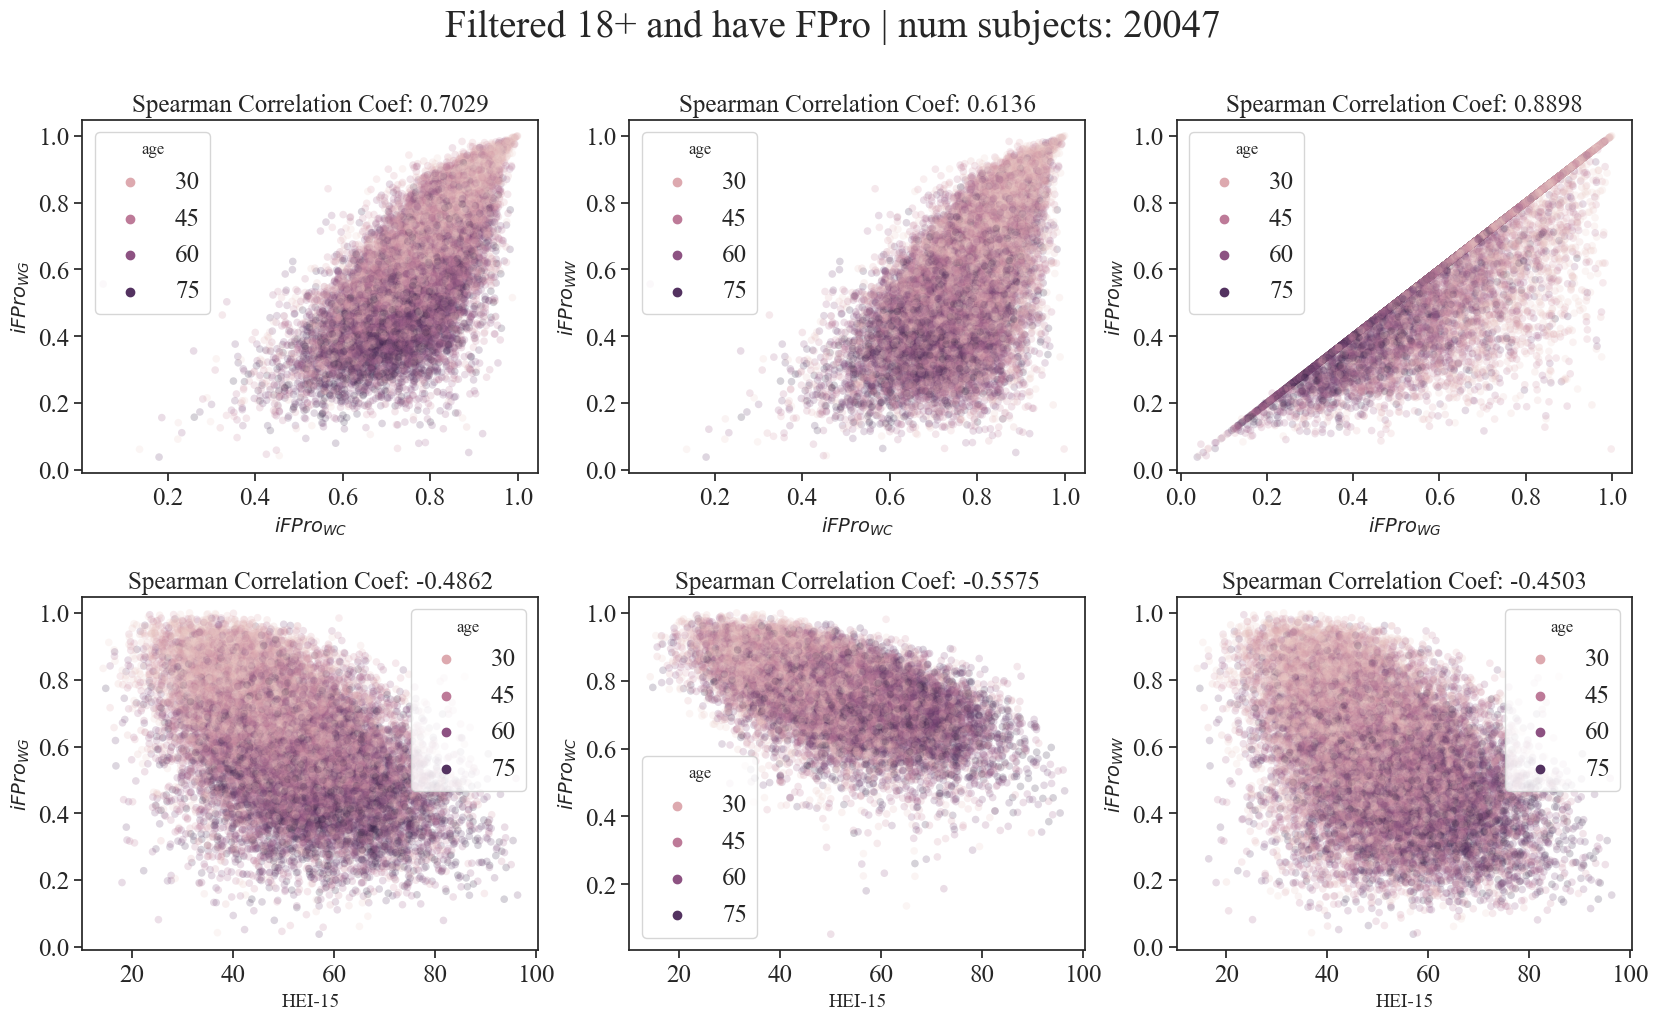

In [29]:
SMALL_SIZE = 18
MEDIUM_SIZE = 14
BIGGER_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

matplotlib.rcParams['font.serif'] = "Times New Roman"
matplotlib.rcParams['font.family'] = "serif"
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})

plot_x_y_vars = [
    ('ens_FPro.WCDPI', 'ens_FPro.RW.WFDPI'),
    ('ens_FPro.WCDPI', 'ens_FPro.WFDPI'), 
    ('ens_FPro.RW.WFDPI', 'ens_FPro.WFDPI'),
    
    ('HEI-15', 'ens_FPro.RW.WFDPI'), 
    ('HEI-15', 'ens_FPro.WCDPI'), 
    ('HEI-15', 'ens_FPro.WFDPI'), 
    ]

ncols = 3

fig, axes = plt.subplots(nrows=2, ncols=ncols, #constrained_layout=True,
    sharex=False, sharey=False, dpi=100, figsize=(20, 11))

fig.suptitle('Filtered 18+ and have FPro | num subjects: {}'.format(len(age_design_df)))

# from matplotlib import rc
# rc('text', usetex=True)

row_num = -1
for i, plot_x_y_var in enumerate(plot_x_y_vars):
    if (i) % ncols == 0:
        row_num += 1
        
#     print(row_num, (i % 3))
    x_col , y_col = plot_x_y_var

    corr, _ = spearmanr(age_design_df[x_col], age_design_df[y_col])
    
#     corr_age, _ = spearmanr(age_design_df[x_col], age_design_df['age'])

    g = sns.scatterplot(data=age_design_df, 
                        x=x_col, 
                        y=y_col, 
                        ax=axes[row_num, (i % ncols)], 
                        s=30, alpha=0.2, linewidth=0.0,
                        hue='age'
                       )
    
#     g.set(xscale="log", yscale="log")
# g.set_title(r"$\textbf{A}$" + 'Spearman Correlation Coef: {}'.format(round(corr, 4)), loc='left')
    g.set_title('Spearman Correlation Coef: {}'.format(round(corr, 4)), loc='center')
#     g.set_title('Corr Coef: {} | age-xAxis: {}'.format(round(corr, 4), round(corr_age, 4) ))
    g.set(#ylim=(0, 1), xlim=(0, 1), 
          xlabel=covars_latex_dicts[x_col], ylabel=covars_latex_dicts[y_col])
    pass

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.35)

# fig.tight_layout()

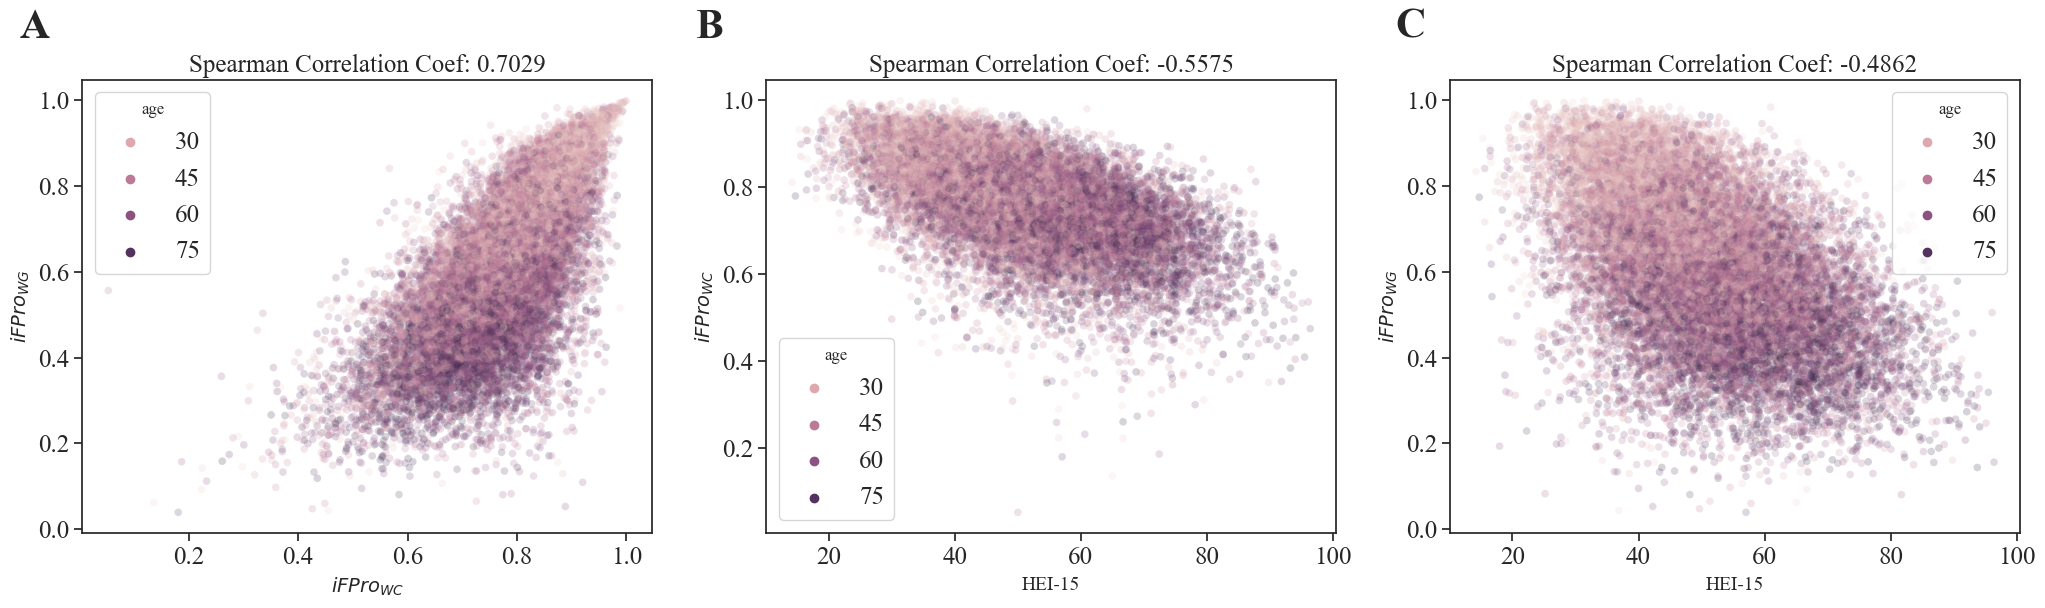

In [11]:
SMALL_SIZE = 18
MEDIUM_SIZE = 14
BIGGER_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

matplotlib.rcParams['font.serif'] = "Times New Roman"
matplotlib.rcParams['font.family'] = "serif"
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})

plot_x_y_vars = [
    ('ens_FPro.WCDPI', 'ens_FPro.RW.WFDPI'),
    ('HEI-15', 'ens_FPro.WCDPI'), 
    ('HEI-15', 'ens_FPro.RW.WFDPI')
    ]

ncols = 3

fig, axes = plt.subplots(nrows=1, ncols=ncols, #constrained_layout=True,
    sharex=False, sharey=False, dpi=100, figsize=(25, 6))

# fig.suptitle('Filtered 18+ and have FPro | num subjects: {}'.format(len(age_design_df)))


row_num = -1
for i, plot_x_y_var in enumerate(plot_x_y_vars):
    if (i) % ncols == 0:
        row_num += 1
        
#     print(row_num, (i % 3))
    x_col , y_col = plot_x_y_var

    corr, _ = spearmanr(age_design_df[x_col], age_design_df[y_col])
    
#     corr_age, _ = spearmanr(age_design_df[x_col], age_design_df['age'])

    g = sns.scatterplot(data=age_design_df, 
                        x=x_col, 
                        y=y_col, 
                        ax=axes[(i % ncols)], 
                        s=30, alpha=0.2, linewidth=0.0,
                        hue='age'
                       )
    
    g.set_title('Spearman Correlation Coef: {}'.format(round(corr, 4)), loc='center')

    g.set(xlabel=covars_latex_dicts[x_col], ylabel=covars_latex_dicts[y_col])
    
    
    pass

g.text(0.10, 0.95, 'A', fontsize=30, fontweight='bold', transform=plt.gcf().transFigure)
g.text(0.37, 0.95, 'B', fontsize=30, fontweight='bold', transform=plt.gcf().transFigure)
g.text(0.65, 0.95, 'C', fontsize=30, fontweight='bold', transform=plt.gcf().transFigure)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=[0.35, 0.3][1])

if True:
#     fig.savefig("FPro_types_correlation.pdf", bbox_inches='tight')
    fig.savefig("FPro_types_correlation.png", bbox_inches='tight')

# fig.tight_layout()

In [19]:
print(plot_x_y_vars)
age_design_df[[
    'SEQN', 
#     'ens_FPro.WCDPI', 'ens_FPro.RW.WFDPI', 
#     'HEI-15', 'ens_FPro.WCDPI', 
    'HEI-15', 'ens_FPro.RW.WFDPI'
]].to_csv('D:/FProXFinal/FigS12/FigS12_C.csv')

[('ens_FPro.WCDPI', 'ens_FPro.RW.WFDPI'), ('HEI-15', 'ens_FPro.WCDPI'), ('HEI-15', 'ens_FPro.RW.WFDPI')]


In [21]:
FPro_corr = []

for measure in [
    'ens_FPro.WCDPI', 'ens_FPro.RW.WFDPI', 'ens_FPro.WFDPI',  
    'HEI-15']:
    
    corr, _ = spearmanr(age_design_df['age'], age_design_df[measure])
    
    if 'FPro' in measure:
        FPro_corr.append(corr)
    
    print('Spearman Correlation Between Age & {}: {}'.format(measure, corr))
    pass

np.mean(FPro_corr)

Spearman Correlation Between Age & ens_FPro.WCDPI: -0.23430320723221948
Spearman Correlation Between Age & ens_FPro.RW.WFDPI: -0.39079962775318616
Spearman Correlation Between Age & ens_FPro.WFDPI: -0.32596324576377955
Spearman Correlation Between Age & HEI-15: 0.26445989279179133


-0.3170220269163951

## Challenges
- https://stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots-with-pyplot
- https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots-in-matplotlib

# Corr beta values

In [24]:
# D:/Dropbox (CCNR)/Foodome Team Folder/Menichetti, Giulia/FoodProcessing/Datasets/00 Final Package/
# D:\Dropbox (CCNR)\Foodome Team Folder\Menichetti, Giulia\FoodProcessing\Datasets\00 Final Package\043021\df_summary_ens_min.csv
path_final_package = 'D:/Dropbox (CCNR)/Foodome Team Folder/Menichetti, Giulia/FoodProcessing/Datasets/00 Final Package/043021/'

In [25]:
EWAS_summary_df = pd.read_csv(path_final_package + 'df_summary_ens_min.csv')
EWAS_summary_df

,Exposure_Full,var_name,bWFDPI,bWCDPI,bRWWFDPI,bHEI15,bWFDPIp,bWCDPIp,bRWWFDPIp,bHEI15p,category,color
0,Mean Telomere Length,TELOMEAN,-0.062235,-0.072067,-0.063847,0.056954,3.547301e-02,5.724693e-03,2.979674e-02,2.585340e-02,aging,"(1.0, 0.7333333333333333, 0.47058823529411764)"
1,Direct HDL-Cholesterol (mg/dL),LBDHDD,-0.087778,-0.097480,-0.096190,0.093874,7.088605e-06,1.525630e-05,5.355415e-07,1.137006e-05,biochemistry,"(0.4196078431372549, 0.43137254901960786, 0.8117647058823529)"
2,Direct HDL-Cholesterol (mg/dL),LBDHDL,-0.111256,-0.091165,-0.111236,0.112675,7.568214e-12,1.017865e-08,7.797878e-12,2.138438e-09,biochemistry,"(0.4196078431372549, 0.43137254901960786, 0.8117647058823529)"
3,LDL-cholesterol (mg/dL),LBDLDL,0.057753,0.021890,0.030048,-0.035829,8.846629e-04,1.560678e-01,5.068041e-02,3.566431e-02,biochemistry,"(0.4196078431372549, 0.43137254901960786, 0.8117647058823529)"
4,Bone alkaline phosphotase (ug/L),LBXBAP,0.067989,0.036214,0.067208,-0.073701,6.410624e-07,3.982536e-03,1.424838e-06,3.196284e-06,biochemistry,"(0.4196078431372549, 0.43137254901960786, 0.8117647058823529)"
5,C-peptide: SI(nmol/L),LBXCPSI,0.077461,0.060471,0.073216,-0.077596,1.490350e-04,6.729697e-04,2.077193e-04,1.329119e-04,biochemistry,"(0.4196078431372549, 0.43137254901960786, 0.8117647058823529)"
6,C-reactive protein(mg/dL),LBXCRP,0.051537,0.018544,0.048003,-0.077812,7.521935e-07,8.036317e-02,7.672654e-06,1.476447e-12,biochemistry,"(0.4196078431372549, 0.43137254901960786, 0.8117647058823529)"
7,Fibrinogen (mg/dL),LBXFB,0.029061,0.005913,0.026697,-0.047727,1.818381e-01,8.571017e-01,2.192607e-01,2.119511e-02,biochemistry,"(0.4196078431372549, 0.43137254901960786, 0.8117647058823529)"
8,Fasting Glucose (mg/dL),LBXGLU,0.006825,-0.000843,0.031414,-0.011559,6.112868e-01,9.581909e-01,1.504024e-02,3.080375e-01,biochemistry,"(0.4196078431372549, 0.43137254901960786, 0.8117647058823529)"
9,Homocysteine (umol/L),LBXHCY,0.059791,0.030317,0.039996,-0.043167,6.713700e-09,3.599421e-03,1.671207e-06,1.312267e-05,biochemistry,"(0.4196078431372549, 0.43137254901960786, 0.8117647058823529)"


In [26]:
corr, _ = spearmanr(EWAS_summary_df['bRWWFDPI'], EWAS_summary_df['bWFDPI'])

corr

0.8762431249692688

In [27]:
corr, _ = spearmanr(EWAS_summary_df['bWCDPI'], EWAS_summary_df['bWFDPI'])

corr

0.601781361730225

In [28]:
corr, _ = spearmanr(EWAS_summary_df['bWCDPI'], EWAS_summary_df['bRWWFDPI'])

corr

0.6722453633785933

# Check Individual A and B in 1999 2018

In [29]:
path_datasets = 'D:/Dropbox (CCNR)/Foodome Team Folder/Menichetti, Giulia/FoodProcessing/Datasets/'

iFPRO_df = pd.read_csv(path_datasets + 'all_diet_data_1999_2018_58_nuts_single_and_ensemble_FPro.csv')

In [30]:
iFPRO_df['year'].value_counts()

2001    11039
2009    10537
2005    10348
2013    10175
2007    10149
2003    10122
2015    9971 
1999    9965 
2011    9756 
2017    9254 
Name: year, dtype: int64

In [31]:
iFPRO_df.columns

Index(['Unnamed: 0', 'SEQN', 'year', 'Mortality eligstat',
       'Mortality mortstat', 'Mortality ucod_leading', 'Mortality diabetes',
       'Mortality hyperten', 'Mortality permth_int', 'Mortality permth_exm',
       'comorbid congestive heart failure', 'comorbid myocardial infarction',
       'comorbid coronary heart disease', 'comorbid stroke', 'comorbid cancer',
       'comorbid high cholesterol', 'comorbid diabetes',
       'comorbid hypertension', 'RIDAGEYR', 'RIAGENDR', 'SDMVPSU', 'SDMVSTRA',
       'WTINT2YR', 'WTMEC2YR', 'RIDRETH1', 'DMDEDUC2', 'INDHHINC', 'INDFMINC',
       'INDFMPIR', 'DMDMARTL', 'BMXBMI', 'BMXWT', 'LBDHDL', 'LBXGLU', 'SMQ020',
       'SMQ040', 'current_past_smoking', 'physical_activity_minutes_based',
       'BMXWAIST', 'LBXSTR', 'BPQ090D', 'LBDHDD', 'BPXSY1', 'BPXDI1',
       'BPQ050A', 'BPQ040A', 'DIQ070', 'MSYDC1 elevated waist circumference',
       'MSYDC2 elevated triglycerides',
       'MSYDC2 elevated triglycerides only examination',
       'MSYDC

In [32]:
path_individual_A_B = 'D:/Dropbox (CCNR)/Foodome Team Folder/Menichetti, Giulia/FoodProcessing/Datasets/NHANES Dishes Individuals Samples/'

individual = ['A', 'B'][1]
individuals_dicts = {'A': 59440, 'B': 68484}

tmp_df = iFPRO_df[iFPRO_df['SEQN'] == individuals_dicts[individual]][[
    'SEQN', 'RIDAGEYR', 'RIAGENDR', 'year', 'num_unique_dishes',
    'FPro WFDPI mean of both days sum',
    'FPro RW WFDPI mean of both days sum',
    'FPro WCDPI mean of both days sum',
    'ens_FPro WFDPI mean of both days sum',
    'ens_FPro RW WFDPI mean of both days sum',
    'ens_FPro WCDPI mean of both days sum',
    'ens_min_FPro WFDPI mean of both days sum',
    'ens_min_FPro RW WFDPI mean of both days sum',
    'ens_min_FPro WCDPI mean of both days sum'
]]

save_xls(
    tmp_df, 
    xls_path='{}/iFPro_individual_{}_SEQN_{}.xls'.format(path_individual_A_B, individual, individuals_dicts[individual]), 
    open=True
)

tmp_df

C:\anaconda3\envs\foodome\lib\site-packages\IPython\core\interactiveshell.py:3437: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  exec(code_obj, self.user_global_ns, self.user_ns)


,SEQN,RIDAGEYR,RIAGENDR,year,num_unique_dishes,FPro WFDPI mean of both days sum,FPro RW WFDPI mean of both days sum,FPro WCDPI mean of both days sum,ens_FPro WFDPI mean of both days sum,ens_FPro RW WFDPI mean of both days sum,ens_FPro WCDPI mean of both days sum,ens_min_FPro WFDPI mean of both days sum,ens_min_FPro RW WFDPI mean of both days sum,ens_min_FPro WCDPI mean of both days sum
68483,68484.0,47,1,2011,21.0,0.154118,0.204187,0.396251,0.182033,0.221714,0.398104,0.153706,0.205171,0.389251


# Water Consumption

In [48]:
file_path = '{}/{}.csv'.format(path_SI_data, 'water_consumption_NHANES_1999_2017')

q = pd.read_csv(file_path,index_col=0)

q['Food code'].unique()

array([94000000, 94000100, 94100100, 94300100], dtype=int64)

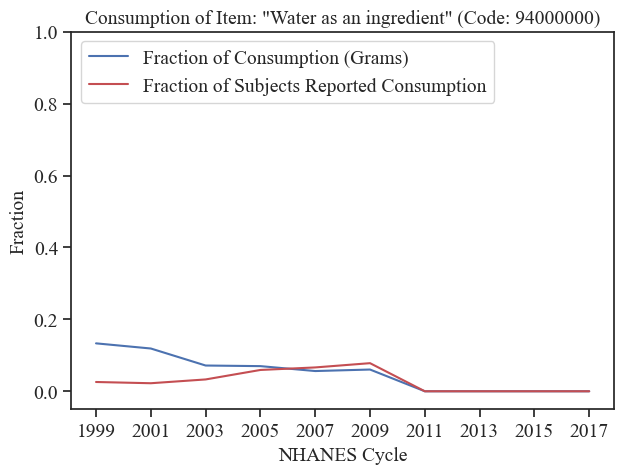

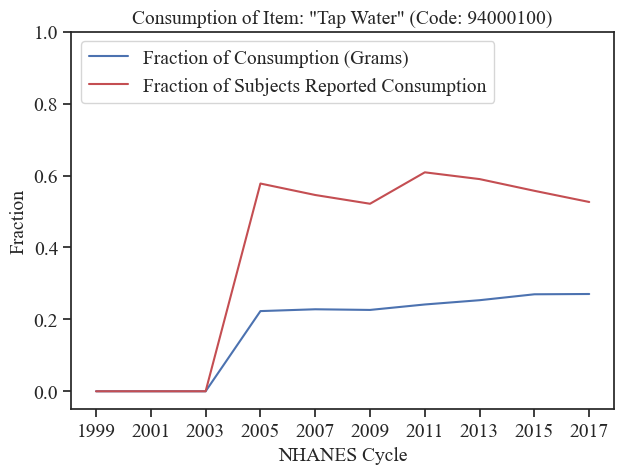

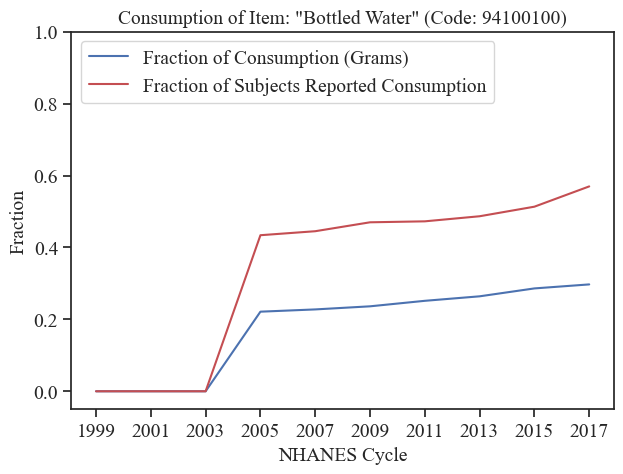

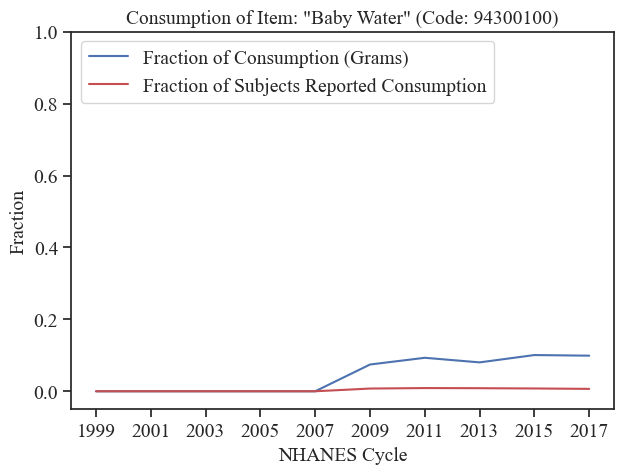

In [56]:
SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

sns.set(style="ticks", font='Times New Roman', font_scale=1.0)
matplotlib.rcParams['font.serif'] = 'Times New Roman'
matplotlib.rcParams['font.family'] = "serif"

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

def plot_food_consumption(food_code, cons_df, title):
    cons_df =  cons_df[cons_df['Food code'] == food_code]
    cons_df = cons_df.rename(columns={
        "('food_consm_frac', 'mean')": 'food_consm_frac_mean',
        "('percent subjects', '')": 'percent subjects'
    })
    cons_df['year'] = cons_df['year'].astype(str)

    fig = plt.figure(figsize=(7,5), dpi=100)
    ax = fig.add_subplot(111)
    ax.plot(cons_df['year'], cons_df['food_consm_frac_mean'], '-', 
            label = 'Fraction of Consumption (Grams)', color="b")
    
    ax.plot(cons_df['year'], cons_df['percent subjects'], '-', 
            label = 'Fraction of Subjects Reported Consumption', color="r")

#     ax2 = ax.twinx()
#     ax2.plot(cons_df['year'], cons_df['percent subjects'], '-', label = 'Percentage of Subjects', color="r")

    ax.legend(loc=2)
#     ax2.legend(loc=0)
    # ax.grid()
    ax.set_xlabel("NHANES Cycle")
#     ax.set_ylabel(r"Consumption Fraction (Average Grams)")
    ax.set_ylabel(r"Fraction")
#     ax2.set_ylabel(r"Percentage of Subjects")
#     ax2.set_ylim(-0.05, 1)
    ax.set_ylim(-0.05,1)
    plt.title(title)
    plt.show()
    
    return cons_df
    
cons_df = plot_food_consumption(food_code=94000000, cons_df=q, title='Consumption of Item: {}'.format('"Water as an ingredient" (Code: 94000000)'))
cons_df.to_csv('D:/FProXFinal/FigS14/FigS14_A.csv')

cons_df = plot_food_consumption(food_code=94000100, cons_df=q, title='Consumption of Item: {}'.format('"Tap Water" (Code: 94000100)'))
cons_df.to_csv('D:/FProXFinal/FigS14/FigS14_B.csv')

cons_df = plot_food_consumption(food_code=94100100, cons_df=q, title='Consumption of Item: {}'.format('"Bottled Water" (Code: 94100100)'))
cons_df.to_csv('D:/FProXFinal/FigS14/FigS14_C.csv')

cons_df = plot_food_consumption(food_code=94300100, cons_df=q, title='Consumption of Item: {}'.format('"Baby Water" (Code: 94300100)'))
cons_df.to_csv('D:/FProXFinal/FigS14/FigS14_D.csv')

# Incomplete Manual NOVA Coverage

In [57]:
# Only for year 2009 use the initial dataset they gave us

path_NOVA_initial_dataset = 'D:/Dropbox (CCNR)/Foodome Team Folder/Menichetti, Giulia/FoodProcessing/Datasets/Training Dataset NOVA/Training Data Original Given by NOVA People - Corrections by Giulia Babak FNDDS 2009-10.xls'

xls = pd.ExcelFile(path_NOVA_initial_dataset)

train_cor = {}

for sheet_name in xls.sheet_names:
    print('Loading sheet: ', sheet_name)
    train_cor[sheet_name] = pd.read_excel(xls, sheet_name)

# D:\Dropbox (CCNR)\Foodome Team Folder\Menichetti, Giulia\FoodProcessing\Datasets\Training Dataset NOVA

Loading sheet:  Given to Giulia from NOVA Peopl
Loading sheet:  Giulia Corrections from Matlab
Loading sheet:  vals counts
Loading sheet:  NOVA Subgroups
Loading sheet:  Recom Raws
Loading sheet:  Preds Giulia Corrections
Loading sheet:  RFFNDDSpredS_cleaned_withsalt
Loading sheet:  matlab mainfooddesc5 tabel
Loading sheet:  Recom Beans
Loading sheet:  Recome Home Recipe 
Loading sheet:  Recom Other


In [58]:
path_manual_NOVA = 'D:/Dropbox (CCNR)/Foodome Team Folder/Menichetti, Giulia/FoodProcessing/Datasets/Euridice STATA Code/FNDDS foods ingreds/'

manul_df = {}
for year in range(2001, 2018, 2):
    print(year)
    
    '''For 2009 use the original data point not the'''
    if year == 2009:
        manul_df['2009'] = train_cor['Given to Giulia from NOVA Peopl']
        
        manul_df['2009 Stata'] = pd.read_excel(path_manual_NOVA + f'FNDDS_food_ingreds_{year}_NOVA.xls')
    else:
        manul_df[str(year)] = pd.read_excel(path_manual_NOVA + f'FNDDS_food_ingreds_{year}_NOVA.xls')
        pass
    pass

2001
2003
2005
2007
2009
2011
2013
2015
2017


In [59]:
perc_unclassified_df = []

for year in range(2001, 2018, 2):
    year = str(year)
    
    print('----------------------- FNDDS', year, '------------------------')
    manul_year_df = manul_df[year].drop_duplicates('dr12ifdcd').reset_index(drop=True)
    
    if set(manul_year_df['fc_or_sr'].unique()) != set(['.', 'f', 's']):
        raise Exception("Must only have ['f' 's' '.'] not" + str(set(manul_year_df['fc_or_sr'].unique()) ))
        
#     print(manul_year_df[manul_year_df['fc_or_sr'].isin(['f'])]['FC_nova_group'].value_counts())
    print('perc_unclassified:', len(manul_year_df[manul_year_df['fc_or_sr'].isin(['s', '.'])]) / len(manul_year_df) * 100)
    
    perc_unclassified_df.append({
        'year': year,
        'perc_unclassified': (
            len(manul_year_df[manul_year_df['fc_or_sr'].isin(['s', '.'])]) / len(manul_year_df)
        ) * 100,
        'perc_marked_dot': (
            len(manul_year_df[manul_year_df['fc_or_sr'].isin(['.'])]) / len(manul_year_df)
        ) * 100,
        'perc_marked_SR': (
            len(manul_year_df[manul_year_df['fc_or_sr'].isin(['s'])]) / len(manul_year_df)
        ) * 100
    })
    
    if year == '2009':
        print('STATA output:', round(100 - 63.87701640700399, 2), '%')

        print('Initial data NOVA shared with us:',
            round(100 - (
                len(manul_year_df[manul_year_df['fc_or_sr'].isin(['s', '.'])]) / len(manul_year_df)
            ) * 100, 2), '%'
         )
        pass
    
    print('Percentage of foods with direct manual NOVA labels:',
        round(100 - (
            len(manul_year_df[manul_year_df['fc_or_sr'].isin(['s', '.'])]) / len(manul_year_df)
        ) * 100, 2), '%'
     )

#     print(perc_unclassified[year], len(manul_year_df))
    pass

perc_unclassified_df = pd.DataFrame(perc_unclassified_df)



----------------------- FNDDS 2001 ------------------------
perc_unclassified: 63.005448809865214
Percentage of foods with direct manual NOVA labels: 36.99 %
----------------------- FNDDS 2003 ------------------------
perc_unclassified: 63.429394812680115
Percentage of foods with direct manual NOVA labels: 36.57 %
----------------------- FNDDS 2005 ------------------------
perc_unclassified: 63.70466695564225
Percentage of foods with direct manual NOVA labels: 36.3 %
----------------------- FNDDS 2007 ------------------------
perc_unclassified: 63.7301366044048
Percentage of foods with direct manual NOVA labels: 36.27 %
----------------------- FNDDS 2009 ------------------------
perc_unclassified: 65.7521025782435
STATA output: 36.12 %
Initial data NOVA shared with us: 34.25 %
Percentage of foods with direct manual NOVA labels: 34.25 %
----------------------- FNDDS 2011 ------------------------
perc_unclassified: 64.50511945392492
Percentage of foods with direct manual NOVA labels: 35.

In [60]:
NOVA_2009_STATA = manul_df['2009 Stata'].drop_duplicates('dr12ifdcd').reset_index(drop=True)

print('[FNDDS 2009 STATA (latest NOVA classification)] Rely on SR :',
        round(
            len(NOVA_2009_STATA[NOVA_2009_STATA['fc_or_sr'].isin(['s'])]) / len(NOVA_2009_STATA) * 100,
            2
        )
)

[FNDDS 2009 STATA (latest NOVA classification)] Rely on SR : 58.98


In [61]:
perc_unclassified_df['perc_classified_f'] = 100 - perc_unclassified_df['perc_unclassified']

print('Average direct manually classified items (marked as f) within all cycles:',
      perc_unclassified_df['perc_classified_f'].mean().round(2)
     )

perc_unclassified_df

Average direct manually classified items (marked as f) within all cycles: 34.97


,year,perc_unclassified,perc_marked_dot,perc_marked_SR,perc_classified_f
0,2001,63.005449,5.448810,57.556639,36.994551
1,2003,63.429395,5.403458,58.025937,36.570605
2,2005,63.704667,5.042624,58.662043,36.295333
3,2007,63.730137,4.850850,58.879286,36.269863
4,2009,65.752103,10.064801,55.687302,34.247897
5,2011,64.505119,5.250722,59.254397,35.494881
6,2013,68.404405,8.223993,60.180412,31.595595
7,2015,68.032221,6.950518,61.081703,31.967779
8,2017,64.746576,4.475505,60.271072,35.253424


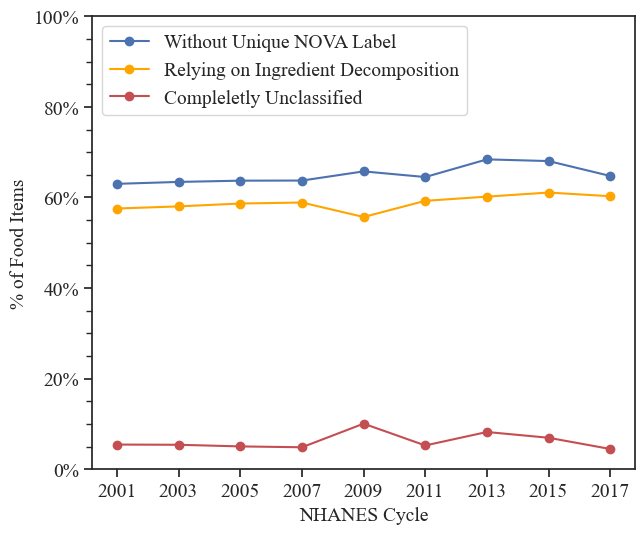

In [62]:
SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

sns.set(style="ticks", font='Times New Roman', font_scale=1.0)
matplotlib.rcParams['font.serif'] = 'Times New Roman'
matplotlib.rcParams['font.family'] = "serif"

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


perc_unclassified_df['year'] = perc_unclassified_df['year'].astype(str)

fig = plt.figure(figsize=(7,6), dpi=100)
ax = fig.add_subplot(111)
ax.plot(perc_unclassified_df['year'], perc_unclassified_df['perc_unclassified'], '-', 
        marker='o', label = 'Without Unique NOVA Label', color="b")

ax.plot(perc_unclassified_df['year'], perc_unclassified_df['perc_marked_SR'], '-', 
        marker='o', label = 'Relying on Ingredient Decomposition', color='orange')

ax.plot(perc_unclassified_df['year'], perc_unclassified_df['perc_marked_dot'], '-', 
        marker='o', label = 'Compleletly Unclassified', color='r')

ax.legend(loc=2)

ax.set_xlabel("NHANES Cycle")
ax.set_ylabel(r"% of Food Items")
ax.set_ylim(0, 100)

import matplotlib.ticker as tck

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.yaxis.set_minor_locator(tck.AutoMinorLocator(4))

# plt.title(title)

if True:
    fig.savefig("NOVA_unclassified_percentage.pdf", bbox_inches='tight')

plt.show()


In [69]:
perc_unclassified_df[['year', 'perc_unclassified', 'perc_marked_SR', 'perc_marked_dot']].rename(columns={
    'perc_unclassified': 'Without Unique NOVA Label', 'perc_marked_SR': 'Relying on Ingredient Decompositio', 'perc_marked_dot': 'Compleletly Unclassified'
}).to_csv('D:/FProXFinal/FigS03/FigS3.csv')

# End